In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 🧪 Plot style
sns.set(style="whitegrid")
%matplotlib inline


In [2]:
# Load cleaned dataset
data_path = r"C:\Users\choma\OneDrive\Documents\Profile Projects\retail-sales-analysis\data\processed\cleaned_retail_sales.csv"
df = pd.read_csv(data_path)

#  Ensure datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')


C:\Users\choma\AppData\Local\Temp\ipykernel_15388\1562407545.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('date').resample('M')['total_amount'].sum()


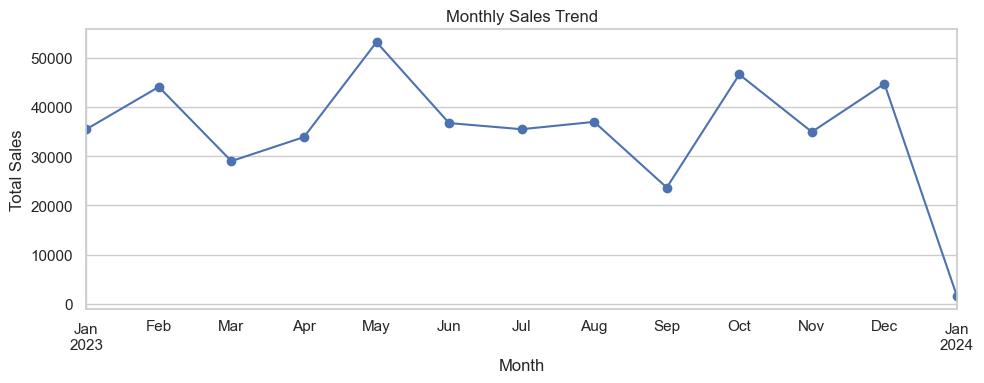

In [3]:
# Monthly Sales Trend
monthly_sales = df.set_index('date').resample('M')['total_amount'].sum()

plt.figure(figsize=(10, 4))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()

# Save figure
fig_dir = "figures"
os.makedirs(fig_dir, exist_ok=True)
plt.savefig(os.path.join(fig_dir, "03_monthly_sales_trend.png"))
plt.show()


C:\Users\choma\AppData\Local\Temp\ipykernel_15388\35393086.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_sales, x='gender', y='total_amount', palette='pastel')


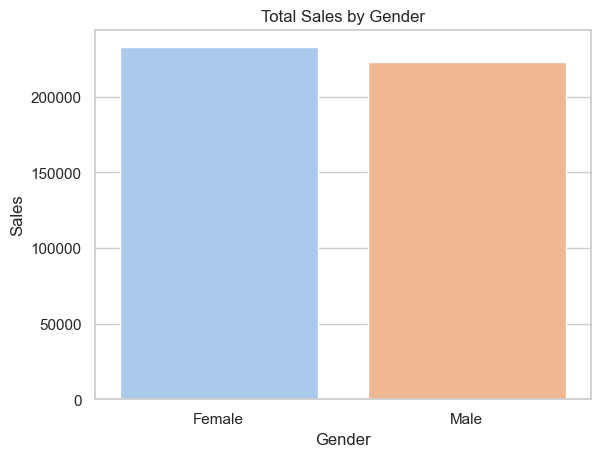

In [4]:
gender_sales = df.groupby('gender')['total_amount'].sum().reset_index()

sns.barplot(data=gender_sales, x='gender', y='total_amount', palette='pastel')
plt.title('Total Sales by Gender')
plt.ylabel('Sales')
plt.xlabel('Gender')

plt.savefig(os.path.join(fig_dir, "03_total_sales_by_gender.png"))
plt.show()


C:\Users\choma\AppData\Local\Temp\ipykernel_15388\924568841.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')


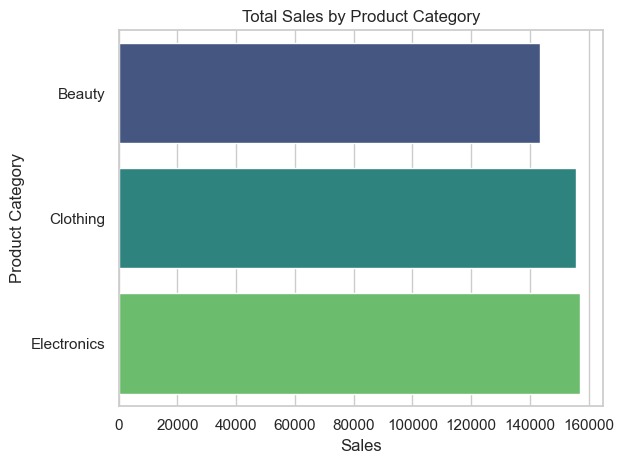

In [5]:
# Total Sales by Product Category
category_sales = df.groupby('product_category')['total_amount'].sum().sort_values(ascending=True)

sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')
plt.title("Total Sales by Product Category")
plt.xlabel("Sales")
plt.ylabel("Product Category")
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, "03_sales_by_category.png"))
plt.show()



C:\Users\choma\AppData\Local\Temp\ipykernel_15388\1420506308.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby('age_group')['total_amount'].sum().reset_index()
C:\Users\choma\AppData\Local\Temp\ipykernel_15388\1420506308.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_sales, x='age_group', y='total_amount', palette='Blues_d')


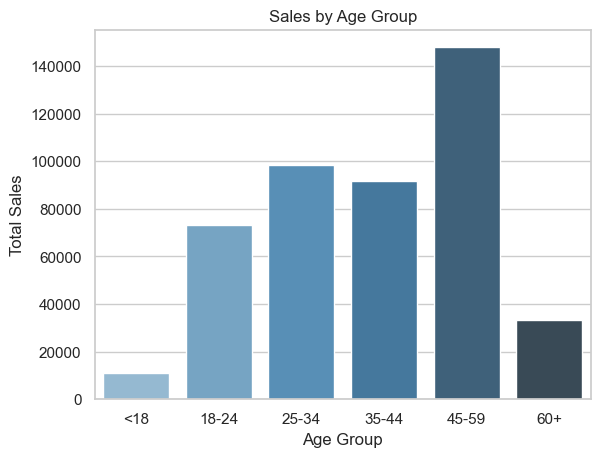

In [6]:
#  Create age bins
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-59', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

age_group_sales = df.groupby('age_group')['total_amount'].sum().reset_index()

sns.barplot(data=age_group_sales, x='age_group', y='total_amount', palette='Blues_d')
plt.title('Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')

plt.savefig(os.path.join(fig_dir, "03_sales_by_age_group.png"))
plt.show()


C:\Users\choma\AppData\Local\Temp\ipykernel_15388\3772815718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_order_value, x='gender', y='total_amount', palette='muted')


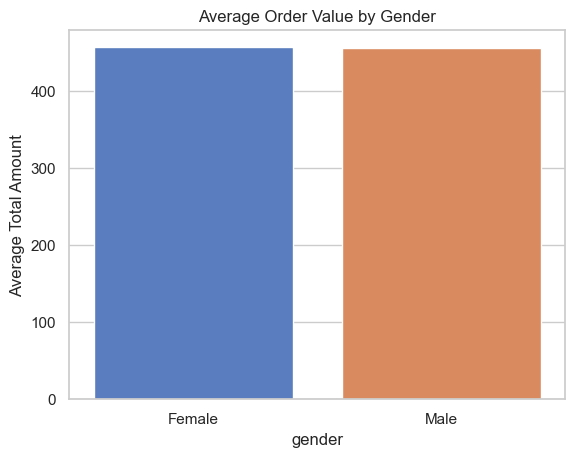

In [7]:
avg_order_value = df.groupby('gender')['total_amount'].mean().reset_index()

sns.barplot(data=avg_order_value, x='gender', y='total_amount', palette='muted')
plt.title('Average Order Value by Gender')
plt.ylabel('Average Total Amount')

plt.savefig(os.path.join(fig_dir, "03_average_order_value_by_gender.png"))
plt.show()


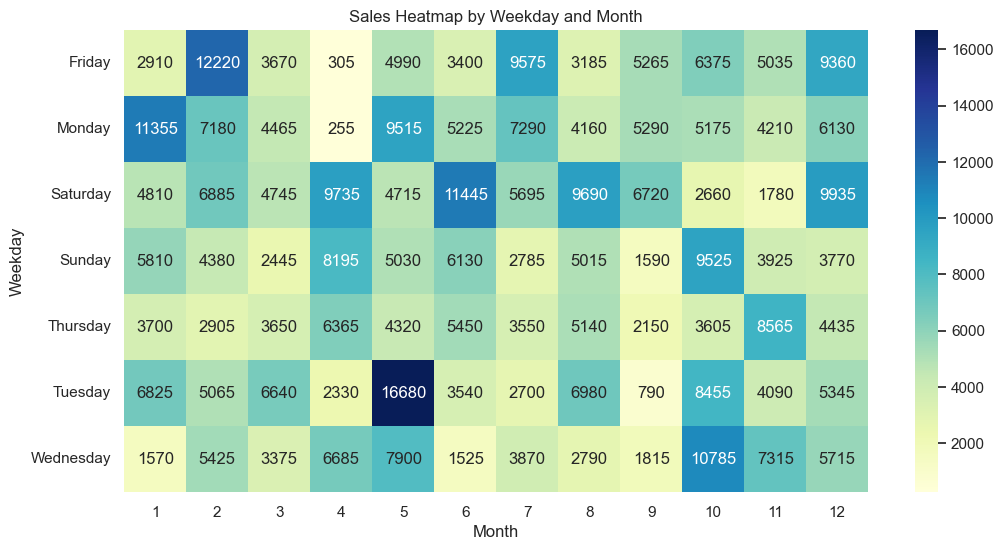

In [9]:
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.day_name()

pivot = pd.pivot_table(
    df,
    index='weekday',
    columns='month',
    values='total_amount',
    aggfunc='sum'
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales Heatmap by Weekday and Month")
plt.xlabel("Month")
plt.ylabel("Weekday")

plt.savefig(os.path.join(fig_dir, "03_sales_heatmap_by_weekday_and_month.png"))
plt.show()
